In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from pandas import DataFrame

# set this so the graphs open internally
%matplotlib inline

In [2]:
# Read all the files
# main netflix file
netflix_titles = pd.read_csv("netflix_titles.csv")
# netflix original content files
netflix_original = pd.read_csv("netflix_original_movie_data.csv")
# imdb basic name (title) file
imdb_title_basic = pd.read_csv("title.basics.tsv", sep='\t')
# imdb rating file
imdb_ratings = pd.read_csv("title.ratings.tsv", sep='\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Add column called original and give value 1 for original content in netflix_original dataframe
netflix_original["original"] = 1

In [4]:
# delete all columns except Title and original in netflix_original dataframe
# these columns contain lots of missing info and are duplicated in the main netflix file
netflix_original.drop(netflix_original.iloc[:, 2:48], inplace=True, axis=1)
netflix_original.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
# merge the 2 netflix files together
netflix_combined_df = pd.merge(netflix_titles, netflix_original, how="left", left_on="title", \
                               right_on="Title", sort=True, copy=True)

In [6]:
# fill the non-original content as value 0
netflix_combined_df['original'] = netflix_combined_df['original'].fillna(0)

In [7]:
# delete duplicates in netflix_combined_df
netflix_combined_df.drop_duplicates('title', inplace = True)

In [8]:
# check if there are null values in any of the columns in netflix_combined_df
netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7787 non-null   object 
 1   type          7787 non-null   object 
 2   title         7787 non-null   object 
 3   director      5398 non-null   object 
 4   cast          7069 non-null   object 
 5   country       7280 non-null   object 
 6   date_added    7777 non-null   object 
 7   release_year  7787 non-null   int64  
 8   rating        7780 non-null   object 
 9   duration      7787 non-null   object 
 10  listed_in     7787 non-null   object 
 11  description   7787 non-null   object 
 12  Title         417 non-null    object 
 13  original      7787 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 912.5+ KB


In [9]:
# fill those null values with "No info"
netflix_combined_df['director'] = netflix_combined_df['director'].fillna("No info")
netflix_combined_df['cast'] = netflix_combined_df['cast'].fillna("No info")
netflix_combined_df['country'] = netflix_combined_df['country'].fillna("No info")
netflix_combined_df['date_added'] = netflix_combined_df['date_added'].fillna("No info")
netflix_combined_df['rating'] = netflix_combined_df['rating'].fillna("No info")

In [11]:
# delete duplicated Title column
netflix_combined_df.drop(['Title'], inplace=True, axis=1)

In [13]:
# merge the imdb datasets
imdb_df = pd.merge(imdb_title_basic, imdb_ratings, how="inner", on="tconst", sort=True, copy=True)

In [14]:
# merge the imdb_df to the netflix_combined_df
netflix_df = pd.merge(netflix_combined_df, imdb_df, how="left", left_on="title", right_on="primaryTitle")

In [15]:
# delete all the duplicate rows
netflix_df.drop_duplicates('title', inplace = True)

In [16]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         7787 non-null   object 
 1   type            7787 non-null   object 
 2   title           7787 non-null   object 
 3   director        7787 non-null   object 
 4   cast            7787 non-null   object 
 5   country         7787 non-null   object 
 6   date_added      7787 non-null   object 
 7   release_year    7787 non-null   int64  
 8   rating          7787 non-null   object 
 9   duration        7787 non-null   object 
 10  listed_in       7787 non-null   object 
 11  description     7787 non-null   object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

In [17]:
# delete the following columns that are duplicated: 
# tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear
netflix_df.drop(netflix_df.iloc[:, 13:20], inplace=True, axis=1)

In [18]:
# fill those null values with "No info" for string type or 0 for float type
netflix_df['runtimeMinutes'] = netflix_df['runtimeMinutes'].fillna(0)
netflix_df['genres'] = netflix_df['genres'].fillna("No info")
netflix_df['averageRating'] = netflix_df['averageRating'].fillna(0)
netflix_df['numVotes'] = netflix_df['numVotes'].fillna(0)

In [19]:
# export dataframe to file for checking
netflix_df.to_csv("netflix_df.csv")

<AxesSubplot:>

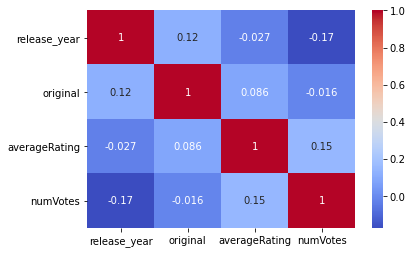

In [20]:
# try to find any correlation factors to analyse
sns.heatmap(netflix_df.corr(),cmap='coolwarm',annot=True)
# Unfortunately, no correlation factors can be found between release_year, 
# original/non-original content, averageRating and numVotes
# To continue analysis further, I would look deeper into different factors individually 
# and study those records or data that perform exceedingly well for those factors 

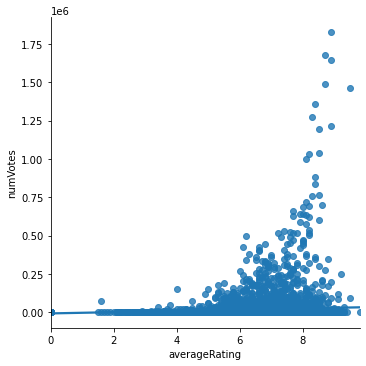

In [21]:
# find what is the baseline of numoVotes to analyse the dataset further
# if there are very few votes casted by users, it probably means that not many people has watched it 
# or the program has not made much impact or impression on viewers
# also the program might be very niche and only appeal to only a small set of viewers
sns.lmplot(x='averageRating',y='numVotes', data= netflix_df, height=5, palette='pastel')
# as evidenced in this graph, there are significant programs with good averageRatings 
# but did not receive many votes from viewers

<AxesSubplot:ylabel='numVotes'>

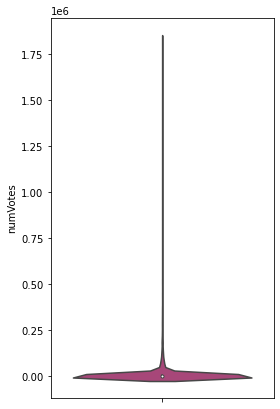

In [22]:
plt.figure(figsize=(4, 7))
sns.violinplot(y="numVotes", data=netflix_df, palette='magma')
# the outliers are mostly those programs that receive many overwhelming votes
# these means the outliers are the programs that have been watched by many users
# this does not mean that the programs receive good user rating 
# but one of the criteria that I want to examine is to have many people watch the programs
# So, we need those outliers for further analysis

In [23]:
# find what is median of numVotes and what is the 3rd quartile averageRating and filter off the rest of the dataset
netflix_df.describe()
# why we are filtering off programs that fall below numVotes median
# we dont want to study programs that has has not made much impact or impression on viewers or 
# only appeal to very specific small set of audience
# it could be that those programs are not well marketed to the audience but 
# since we don't have marketing related data, we would not explore this part for our current analysis
# I will also filter off records that fall below median rating
# as I can assume that those that do not reach the upper QR are programs that are not really enjoyable by the users
# I use upper quartile rating instead of median for averageRating is because
# I don't want to include programs that audience found only acceptable but rather if the programs are good

,release_year,original,averageRating,numVotes
count,7787.000000,7787.000000,7787.000000,7.787000e+03
mean,2013.932580,0.053551,5.195531,1.487910e+04
std,8.757395,0.225144,2.849809,7.658453e+04
min,1925.000000,0.000000,0.000000,0.000000e+00
25%,2013.000000,0.000000,4.400000,1.100000e+01
50%,2017.000000,0.000000,6.300000,2.860000e+02
75%,2018.000000,0.000000,7.200000,2.528500e+03
max,2021.000000,1.000000,9.800000,1.829868e+06


In [24]:
# dataset that are filtered off to fullfill our criteria
filtered_netflix_df = netflix_df[(netflix_df['averageRating'] >= 7.2) & (netflix_df['numVotes'] >=286)]
# sort the dataset to check if the filtering is done correctly
filtered_netflix_df.sort_values(by=['numVotes', 'averageRating'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,original,runtimeMinutes,genres,averageRating,numVotes
13950,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,0.0,154,"Crime,Drama",8.9,1829868.0
20098,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,0.0,136,"Action,Sci-Fi",8.7,1679783.0
19993,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,0.0,201,"Action,Adventure,Drama",8.9,1645594.0
19996,s6618,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,0.0,179,"Action,Adventure,Drama",8.7,1488206.0
2749,s1090,TV Show,Breaking Bad,No info,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,0.0,49,"Crime,Drama,Thriller",9.5,1463223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,s3527,Movie,Lalbaug Parel: Zali Mumbai Sonyachi,Mahesh Manjrekar,"Sachin Khedekar, Seema Biswas, Ankush Chaudhar...",India,"March 15, 2018",2010,TV-MA,145 min,"Dramas, International Movies",Industrial workers struggle against the greed ...,0.0,146,Action,7.2,290.0
15516,s5495,TV Show,Sensitive Skin,No info,"Kim Cattrall, Don McKellar, Nicolas Wright, Jo...",Canada,"December 1, 2019",2016,TV-MA,1 Season,TV Comedies,Davina and Al try to revamp their lives as the...,0.0,29,"Comedy,Drama,Romance",7.9,289.0
19195,s6404,TV Show,The Good Detective,No info,"Son Hyun-joo, Jang Seung-jo, Lee Elijah, Oh Ju...",South Korea,"November 1, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When doubts rise about a five-year-old murder ...,0.0,60,"Action,Drama,Mystery",7.4,289.0
2089,s903,TV Show,"Big Dreams, Small Spaces",No info,Monty Don,United Kingdom,"July 26, 2019",2017,TV-G,3 Seasons,"British TV Shows, International TV Shows, Real...",Writer and presenter Monty Don helps England's...,0.0,\N,Reality-TV,8.1,287.0


Text(0.5, 1.0, 'Top 5 countries that release programs in Netflix')

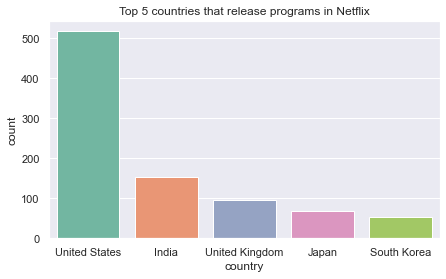

In [69]:
# check which country released the most content
# this reflects the demand and business model of netflix
# assumes that there are significant netflix viewers from these countries 
# or significant netflix viewers who love the content from these countries
plt.figure(figsize=(7,4))
sns.set(style="darkgrid")
sns.countplot(x="country", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['country'].value_counts().index[0:5])\
.set_title("Top 5 countries that release programs in Netflix")

[Text(0.5, 1.0, 'Top 8 Countries with high user ratings'),
 Text(0.5, 0, 'Countries'),
 Text(0, 0.5, 'Average Rating')]

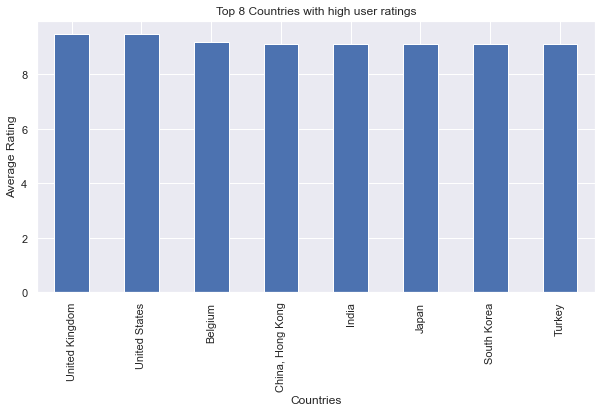

In [72]:
# just because there is demand from those 5 countries, does not mean the countries produce very good content
# find out the top 10 countries that gets highest user rating
ax = filtered_netflix_df.groupby('country')['averageRating'].agg('max').nlargest(8).plot(kind='bar', figsize=(10, 5))
ax.set(title = "Top 8 Countries with high user ratings", xlabel="Countries", ylabel ="Average Rating")
# comparing with the above countplot, we can see that it makes sense for Netflix to produce more content 
# from the top 5 countries
# Also Netflix can look more deeper to analyse contents produced by the other countries not in the above top 5:
# Belgium, (China, Hong Kong), Turkey
# These might be potential good contents that can be explored in those 3 countries

In [26]:
# filter off records that contains No info for directors
# otherwise countplot contains 'No info'
directors_df = filtered_netflix_df[(filtered_netflix_df['director'] != 'No info')]
directors_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,original,runtimeMinutes,genres,averageRating,numVotes
23,s55,Movie,100 Meters,Marcel Barrena,"Dani Rovira, Karra Elejalde, Alexandra Jiménez...","Portugal, Spain","March 10, 2017",2016,TV-MA,109 min,"Dramas, International Movies, Sports Movies",A man who is diagnosed with multiple sclerosis...,0.0,108,"Biography,Comedy,Drama",7.6,5289.0
85,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",2016,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",0.0,119,"Comedy,Drama",7.3,40257.0
111,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",No info,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,0.0,115,"Crime,Drama",7.8,2286.0
114,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,0.0,170,"Comedy,Drama",8.4,345258.0
122,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",0.0,105,"Biography,Drama",7.2,903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23858,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za...",0.0,72,"Comedy,Documentary",7.3,3608.0
23921,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,0.0,155,"Comedy,Drama",8.1,68035.0
23944,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,0.0,10,"Documentary,Short",7.4,474.0
23967,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0.0,\N,"Comedy,Drama,Family",7.6,304.0


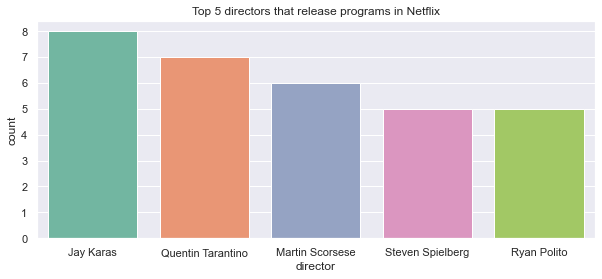

In [74]:
# Netflix content with the top 5 directors shows that are available in Netflix
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="director", data=directors_df, palette="Set2", \
                   order=directors_df['director'].value_counts().index[0:5])\
.set_title("Top 5 directors that release programs in Netflix")

[Text(0.5, 1.0, 'Top 5 Directors with high user ratings'),
 Text(0.5, 0, 'Director'),
 Text(0, 0.5, 'Average Rating')]

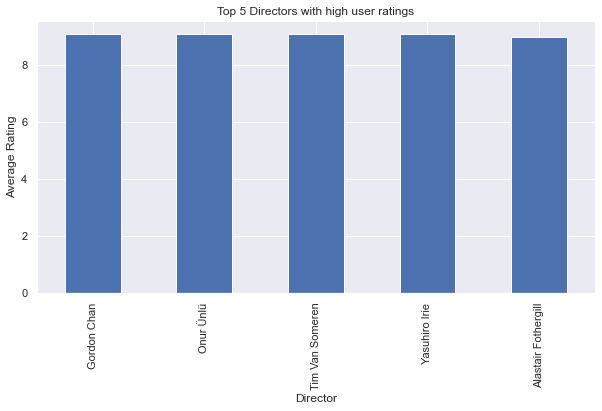

In [73]:
# however, when I compare with the chart below to see which directors produce the highest user rating
# different directors appear. They are mostly NON-AMERICAN directors
# Netflix can try to work with these directors and market them more in their platform
# so that more viewers are able to know/find and enjoy their shows
ax = directors_df.groupby('director')['averageRating'].agg('max').nlargest(5).plot(kind='bar', figsize=(10, 5))
ax.set(title = "Top 5 Directors with high user ratings", xlabel="Director", ylabel ="Average Rating")

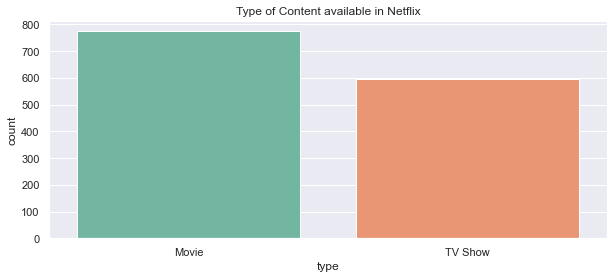

In [75]:
# More movie compared to TV shows are available in Netflix
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['type'].value_counts().index[0:2])\
.set_title("Type of Content available in Netflix")

[Text(0.5, 1.0, 'Type of content with high user ratings'),
 Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Average Rating')]

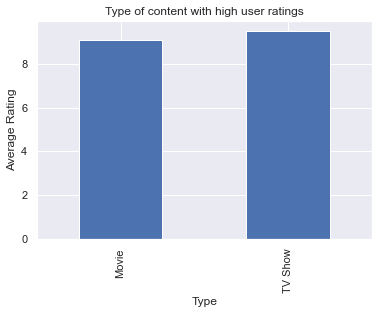

In [77]:
# But TV shows seems to be slightly more enjoyable for Netflix users
# Netflix could look into producing or getting more TV shows on their platform
# There could be other reasons that makes Netflix upload more movies such as 
# movies are easier to obtain license for broadcasting, etc 
# but Netflix could also seriously could think about expanding their catalog of TV shows
# as many viewers seems more favourable and enjoy TV shows
ax = filtered_netflix_df.groupby('type')['averageRating'].agg('max').plot(kind='bar')
ax.set(title = "Type of content with high user ratings", xlabel="Type", ylabel ="Average Rating")

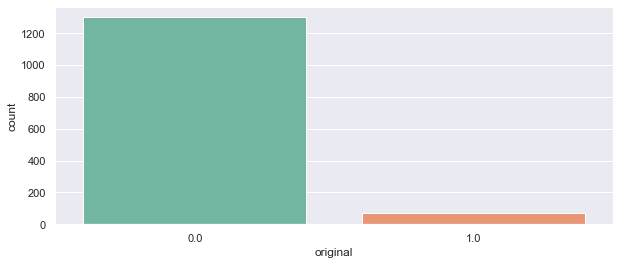

In [32]:
# As evidenced in the graph below, there are more non-original Netflix content available 
# as Netflix only start producing their own content from 2012 onwards
# 0 stands for non-original
# 1 stands for original
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="original", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['original'].value_counts().index[0:2])\
.set_title("Type of Content available in Netflix")

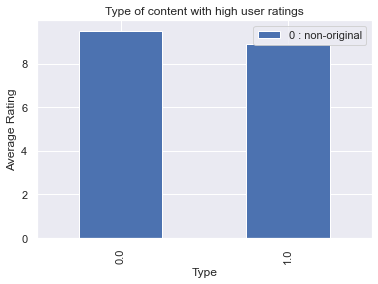

In [84]:
# comparing original and non-original content, the rating for the best user rating has not much difference
# therefore, Nteflix can be assured that they can still use both strategies concurrently: 
# getting other contents and producing their own at the same time
# 0 stands for non-original
# 1 stands for original
# Also since it is harder for Netflix to obtain TV license, it makes more sense 
# for Netflix to produce more of theor own original TV content
ax = filtered_netflix_df.groupby('original')['averageRating'].agg('max').plot(kind='bar')
ax.set(title = "Type of content with high user ratings", xlabel="Type", ylabel ="Average Rating")
ax.legend(['0 : non-original', '1 : original'])

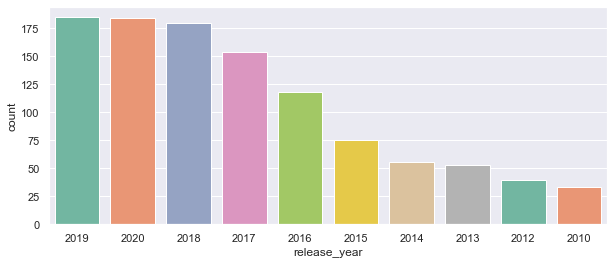

In [35]:
# Most content available on Netflix are contents that are recently released from 2016 onwards
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="release_year", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['release_year'].value_counts().index[0:10])

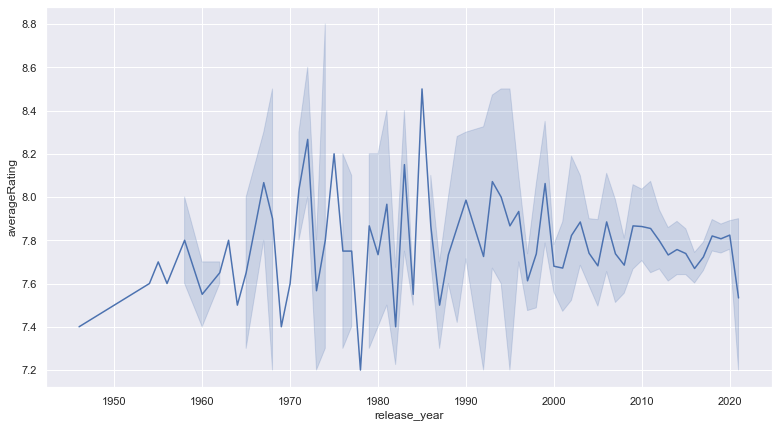

In [36]:
# However, as shown in the graph below, the user ratings are spread out over the years
# So release year is not important at all to the user ratings
# But at the same time, there are spikes in some years. That means there are a few standout shows from those year
# Netflix can get these records to study more about the factors that made them given a standout user rating 
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=filtered_netflix_df, x='release_year', y='averageRating')
plt.show()

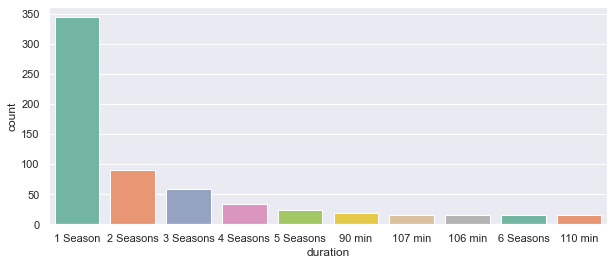

In [37]:
# Most netflix content has duration of 1 season and 90 mins, 107 mins, 110 mins
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="duration", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['duration'].value_counts().index[0:10])

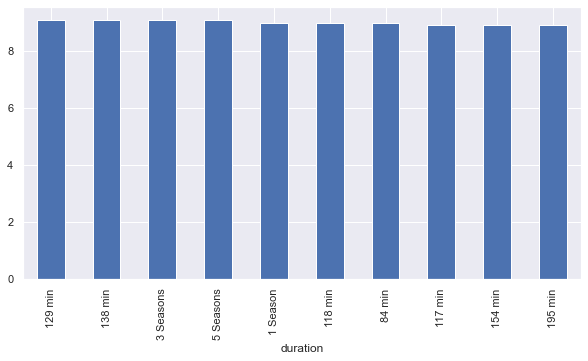

In [38]:
# Check again with graph to pick those shows with high averageRating
# They are generally also in the top 10 results as well
# But there are others like 3 seasons and 5 seasons and slightly more than 107 minutes
# So for TV shows, those performing well are between 1 season to 5 seasons
# And for movies, generally below 195 mins or about 3 hours or lesser
# The reason why there are longer duration programs in the chart below is that those might be the outliers
ax = directors_df.groupby('duration')['averageRating'].agg('max').nlargest(10).plot(kind='bar', figsize=(10, 5))

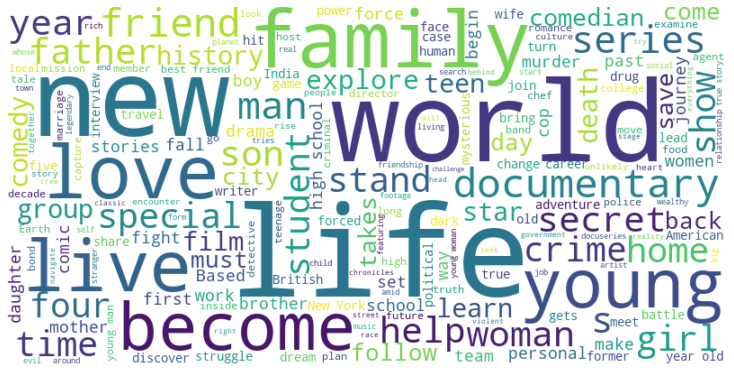

In [39]:
# Find out the words that mostly appear in Netflix description
text = " ".join(word for word in filtered_netflix_df['description'].astype(str))

stop_words = ["one", "two", "three", "find", "finds", "take"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

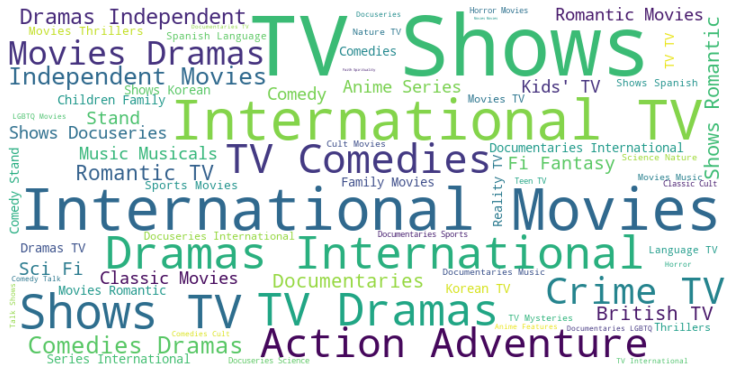

In [40]:
# Find out the words that mostly appear in Netflix categories
text = " ".join(word for word in filtered_netflix_df['listed_in'].astype(str))

stop_words = [""] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

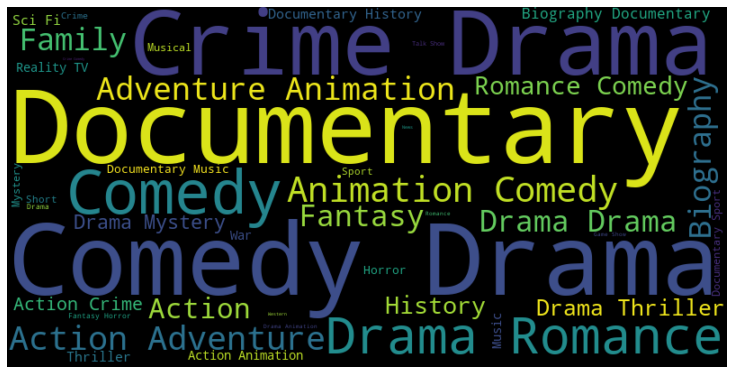

In [87]:
# Find out the words that mostly appear in IMDB genres
text = " ".join(word for word in filtered_netflix_df['genres'].astype(str))

stop_words = [""] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="black", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
# Look at the overlap of between the 3 different wordclouds especially between Netflix categories and IMDB genres
# Comedy, Crime, Drama, Documentary, Romance, Biography, Family, Animation are genres and categories that perform well on both Netflix and IMDB
# So, Netflix should continue to expand on these 4 categories for their catalog as they generally are enjoyed by many.


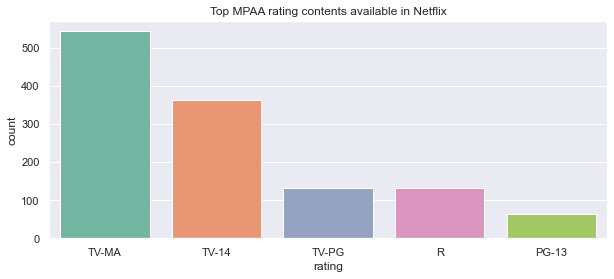

In [85]:
# mpaa_rating
# Compared to family friendly shows, it seems Netflix content shows are geared mainly towards adults
# TV-MA: program for mature audience only
# TV-14 : program contains some material that many parents would find unsuitable for children under 14 years of age
# TV-PG : Parental guidance suggested. This program contains material that parents may find unsuitable for younger 
# children.
# R : Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian. This rating means the film 
# contains adult material such as adult activity, harsh language, intense graphic violence, drug abuse and nudity.
# PG-13: Parents Strongly Cautioned. Some Material May Be Inappropriate For Children Under 13.
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['rating'].value_counts().index[0:5])\
.set_title("Top MPAA rating contents available in Netflix")

[Text(0.5, 1.0, 'Top MPAA rating with high user ratings'),
 Text(0.5, 0, 'MPAA Rating'),
 Text(0, 0.5, 'Average Rating')]

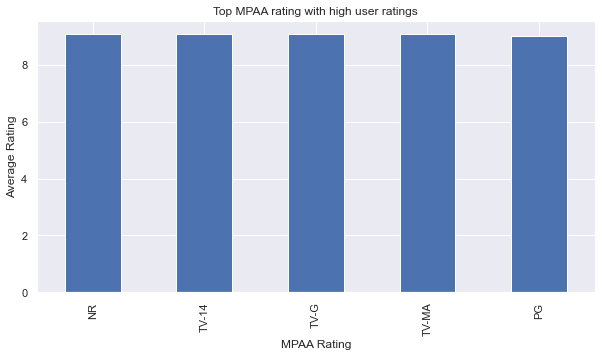

In [86]:
# However shows that perform well are a mixture of both mature programs and child friendly programs
# Therefore Netflix can consider to add more catalogue of child friendly programs in the future
# It would be also be good if Netflix platform implement good features to prevent children from accessing
# inappropriate content before adding more child friendly programs
# This is to increase more viewership so that parents can be assured 
# to let their child watch those programs on their own
ax = directors_df.groupby('rating')['averageRating'].agg('max').nlargest(5).plot(kind='bar', figsize=(10, 5))
ax.set(title = "Top MPAA rating with high user ratings", xlabel="MPAA Rating", ylabel ="Average Rating")

In [ ]:
# In summary, there are usually a combination of factors 
# that affect viwership and likability of the shows and programs
# as there is no one factor that has clear direct relationship with each other
# So we study the records base on each factor individually that generally are on the outliers and try to combine them 
# to replicate a new program that has likelihood to be successfully enjoyed by many

# From all the above insights, it seems Netflix is on a good track that broadcast many enjoyable contents for its viewers
# To remain competitive, Netflix should continue to produce its own original TV shows content
# Netflix can also think about partnering with international directors with proven good rating contents
# and broadcast more contents from other countries such as India, UK, Japan, South Korea as it seems its viewers are 
# acceptable to watch these countries

# If they apply the above suggestions, I believe Netflix will remain ahead of their competitors 
# as most streaming contents only just started producing their own content and they are mostly US based